This ipynb file contains only dense model with preprocessing

In [1]:
!pip install openbb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.9/918.9 kB 70.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [1]:
import math
import numpy as np

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

import pylab as pl

In [2]:
from openbb_terminal.sdk import openbb

libwebkit2gtk-4.0.so.37: cannot open shared object file: No such file or directory


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

PyWry is not installed or missing required linux dependencies.

Install PyWry
pip install pywry --upgrade

Platform-specific notes
Here is the underlying web engine each platform uses you might need to install.

Linux
Pywry uses gtk-rs and its related libraries for window creation and Wry also needs WebKitGTK for WebView.
To activate interactive plots/tables in pywry window, please make sure the following packages are installed:

Arch Linux / Manjaro:
sudo pacman -S webkit2gtk

Debian / Ubuntu:
sudo apt install libwebkit2gtk-4.0-dev

Fedora / CentOS / AlmaLinux:
sudo dnf install gtk3-devel webkit2gtk3-devel

Continuing with default plotly behaviour (open in browser).

In [3]:
openbb.stocks.candle('AAPL')

Loading Daily data for AAPL with starting period 2020-08-25.

In [40]:
import pandas as pd

train=openbb.stocks.load("AAPL", "2010-01-01",1440,"2017-01-01")

Loading Daily data for AAPL with starting period 2010-01-04.

In [41]:
test=openbb.stocks.load("AAPL", "2017-01-01",1440,"2019-01-01")

Loading Daily data for AAPL with starting period 2017-01-03.

In [42]:
index=[]
for i in range(len(train)):
  index.append(i)

train["index"]=index

In [43]:
index=[]
for i in range(len(test)):
  index.append(i)

test["index"]=index

In [44]:
x=[]
y=[]
x_test=[]
y_test=[]

In [45]:
close_list=[]
close_list.append(train["Close"][0])

In [46]:
test_close=[]
test_close.append(test["Close"][0])


In [47]:
for i in range(1,len(train)):
  date=int(str(train.index[i]).split()[0].split("-")[2])
  prev_date = int(str(train.index[i-1]).split()[0].split("-")[2])


  if date > (prev_date+1) and date < (prev_date+3) and date != 1:
			print("date: {}, prev: {}".format(date,prev_date))
			close_list.append(train["Close"][i-1])

  close_list.append(train["Close"][i])


date: 26, prev: 24
date: 25, prev: 23
date: 5, prev: 3
date: 23, prev: 21
date: 26, prev: 24
date: 5, prev: 3
date: 29, prev: 27
date: 26, prev: 24
date: 28, prev: 26
date: 26, prev: 24
date: 27, prev: 25
date: 25, prev: 23


In [48]:
for i in range(1,len(test)):
  date = int(str(test.index[i]).split()[0].split("-")[2])
  prev_date = int(str(test.index[i-1]).split()[0].split("-")[2])

  if date > (prev_date+1) and date < (prev_date+3) and date != 1:
    print("date: {}, prev: {}".format(date,prev_date))
    test_close.append(test["Close"][i-1])

  test_close.append(test["Close"][i])

date: 5, prev: 3
date: 24, prev: 22
date: 5, prev: 3
date: 23, prev: 21
date: 6, prev: 4
date: 26, prev: 24


In [49]:
test_close.insert(60, test_close[59])

In [50]:
for i in range(len(close_list)):
  ap=i+1
  if ap%5!=0:
    x.append(close_list[i])
  else:
    y.append(close_list[i])
    count=0


In [51]:
for i in range(len(test_close)):
  bp=i+1
  if bp%5!=0:
    x_test.append(test_close[i])
  else:
    y_test.append(test_close[i])
    count=0


In [52]:
print(len(x))
print(len(y))

1420
354


In [53]:
x=np.array(x).reshape(-1,4)
y=np.array(y).reshape(-1,1)


In [54]:
x_test=np.array(x_test).reshape(-1,4)
y_test=np.array(y_test).reshape(-1,1)

In [55]:
original = y[:]

In [56]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()
y=y_scaler.fit_transform(y)
x=x_scaler.fit_transform(x)


In [57]:
x_test=x_scaler.fit_transform(x_test)
y_test=y_scaler.fit_transform(y_test)
x_test=np.array(x_test).reshape(-1,4,1)
x=np.array(x).reshape(-1,4,1)

In [58]:
x=x[:354]

In [59]:
print(len(x))
print(len(y))

354
354


In [60]:
x_test=x_test[:101]

In [61]:
print(len(x_test))
print(len(y_test))

101
101


In [62]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')



In [63]:
model.fit(x,y,epochs=20,batch_size=32,verbose=0,validation_data=(x_test,y_test))

In [64]:
score = model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 3ms/step - loss: 0.0015


In [65]:
print(score)

0.0015181356575340033


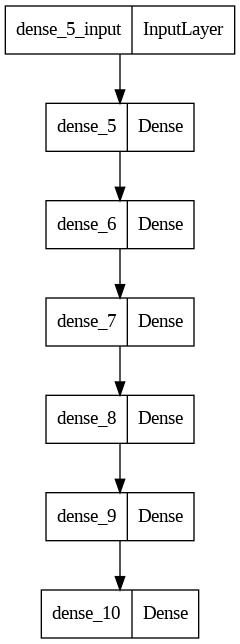

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [67]:
y_predict=model.predict(x_test,batch_size=32)

4/4 [==============================] - 0s 3ms/step


In [68]:
y_fit=model.predict(x,batch_size=32)

12/12 [==============================] - 0s 2ms/step


In [69]:
pred=y_scaler.inverse_transform(y_predict)
actual=y_scaler.inverse_transform(y_test)
fit=y_scaler.inverse_transform(y_fit)
trainy=y_scaler.inverse_transform(y)

In [70]:
diff=pred-actual

In [71]:
print("predicted | original | difference | accuracy")
for i in range(len(y_test)):
  print("{} | {} | {} | {}".format(pred[i], actual[i], diff[i] , (1-(abs(diff[i]/actual[i])))))

predicted | original | difference | accuracy
[29.429861] | [27.72093773] | [1.70892334] | [0.93835261]
[29.435505] | [27.95623016] | [1.47927475] | [0.94708604]
[29.45132] | [27.94924927] | [1.50207138] | [0.94625718]
[29.619438] | [28.27074432] | [1.34869385] | [0.95229366]
[30.497044] | [30.64236832] | [-0.14532471] | [0.99525739]
[31.28974] | [31.5918026] | [-0.30206299] | [0.99043856]
[32.130093] | [32.08081818] | [0.04927444] | [0.99846405]
[32.33484] | [32.70787811] | [-0.37303925] | [0.98859482]
[33.019005] | [32.5230484] | [0.49595642] | [0.98475062]
[32.877415] | [32.86465073] | [0.01276398] | [0.99961162]
[33.11811] | [33.08926392] | [0.02884674] | [0.99912821]
[33.60995] | [33.7210083] | [-0.11105728] | [0.99670658]
[34.137077] | [33.87309647] | [0.26398087] | [0.99220677]
[34.06947] | [33.13840485] | [0.93106461] | [0.97190376]
[33.459072] | [32.91612625] | [0.54294586] | [0.98350517]
[33.836216] | [33.61807632] | [0.21813965] | [0.99351124]
[34.20055] | [34.40890884] | [-0

In [72]:
accuracy = 0
for i in range(len(y_test)):
  accuracy += (1-(abs(diff[i]/actual[i])))

accuracy /= len(y_test)

print("Overall accuracy: " ,accuracy)

Overall accuracy:  [0.97976699]


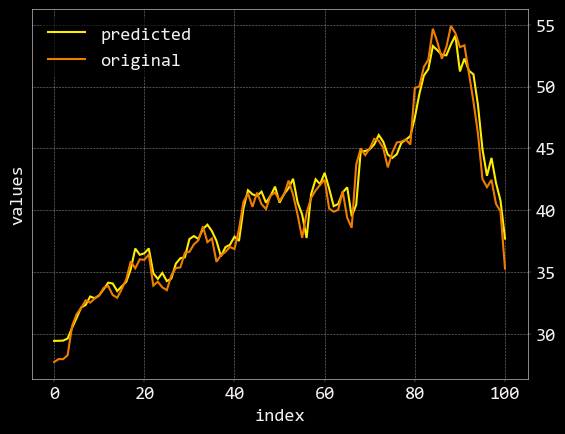

In [73]:
import matplotlib.pyplot as plt
plt.plot(pred,label="predicted")
plt.plot(actual,label="original")
pl.xlabel('index')
pl.ylabel('values')
pl.legend()

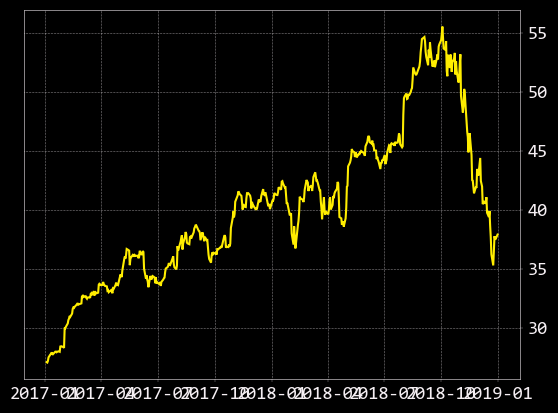

In [74]:
plt.plot(test["Close"])

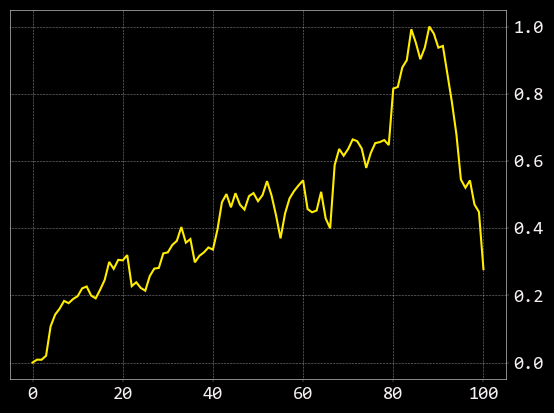

In [75]:
plt.plot(y_test)